# Exercise 7: Implementation (Linear regression) 

## 1- Loading Predefined Data and Visualizing Them

C:\Users\kamil\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\__init__.py:16: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 1.21.5)
  from scipy.sparse import issparse


            X           Y
0    0.315657  -69.749930
1   -1.123502  -30.032873
2   -0.150475   91.612719
3    0.253142  199.762311
4    0.362783   89.139263
..        ...         ...
995 -0.935170 -111.248843
996 -0.752480  -13.966281
997  0.281421    5.129218
998 -2.281058 -139.488605
999 -1.013799 -128.553431

[1000 rows x 2 columns]


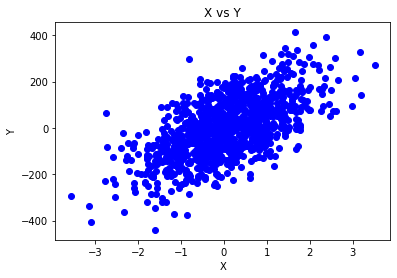

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Generate a random regression dataset with 1000 samples and 1 feature
x, y = make_regression(n_samples=1000, n_features=1, noise=100)

# Create a DataFrame from the generated data
data = pd.DataFrame(x, columns=['X'])
# Adding the target variable
data['Y'] = y
# Display the first few rows of the dataset
print(data)

# Visualize the relationship between the feature and the target
plt.scatter(data['X'], data['Y'], color='blue')
plt.title('X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
0   -0.002592  0.019907 -0.0176

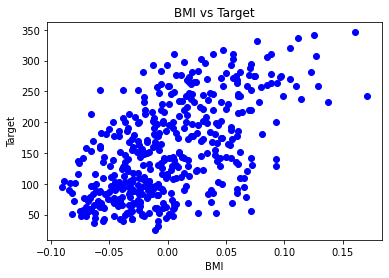

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

# Load the dataset
diabetes = load_diabetes()
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target

# Display the first few rows of the dataset
print(data)

# Visualize the relationship between one feature and the target
plt.scatter(data['bmi'], data['target'], color='blue')
plt.title('BMI vs Target')
plt.xlabel('BMI')
plt.ylabel('Target')
plt.show()

## 2- Splitting the Data into Training, Validation, and Testing Sets


Training set size: 600
Validation set size: 200
Testing set size: 200


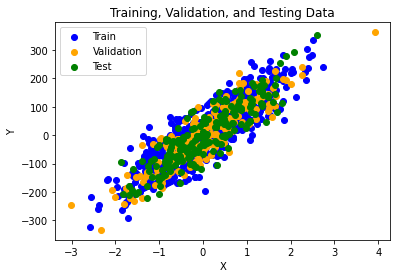

In [3]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Generate a random regression dataset with 1000 samples and 1 feature
X, y = make_regression(n_samples=1000, n_features=1, noise=50)

# Create a DataFrame from the generated data
data = pd.DataFrame(X, columns=['X'])  # Naming the feature 'feature'
data['Y'] = y  # Adding the target variable

# Define X (features) and y (target)
X = data.drop(columns=['Y'])
y = data['Y']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

# Print sizes of the splits
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Testing set size:", len(X_test))

# Visualize training, validation, and testing splits based on 'feature'
plt.scatter(X_train['X'], y_train, label='Train', color='blue')
plt.scatter(X_val['X'], y_val, label='Validation', color='orange')
plt.scatter(X_test['X'], y_test, label='Test', color='green')

# Add labels and title
plt.title('Training, Validation, and Testing Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Training set size: 265
Validation set size: 88
Testing set size: 89


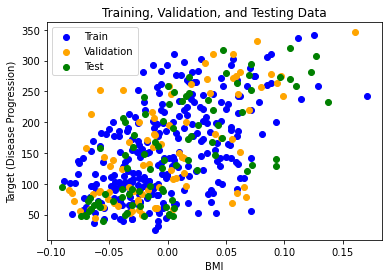

In [4]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Load the Diabetes dataset
diabetes = load_diabetes(as_frame=True)
data = diabetes.frame

# Define X (features) and y (target)
X = data.drop(columns=['target'])
y = data['target']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

# Print sizes of the splits
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Testing set size:", len(X_test))

# Visualize training, validation, and testing splits based on 'bmi' feature
plt.scatter(X_train['bmi'], y_train, label='Train', color='blue')
plt.scatter(X_val['bmi'], y_val, label='Validation', color='orange')
plt.scatter(X_test['bmi'], y_test, label='Test', color='green')

# Add labels and title
plt.title('Training, Validation, and Testing Data')
plt.xlabel('BMI')
plt.ylabel('Target (Disease Progression)')
plt.legend()
plt.show()


## 3- Statistical Measures (MSE, MAE, R²)

Mean Squared Error (MSE): 3.583831071490838
Mean Absolute Error (MAE): 1.570813190953845
R² Score: 0.9614226839455713


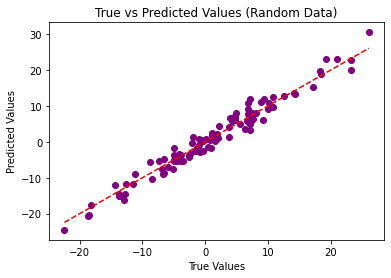

In [5]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# True values: Random values between 0 and 10 (simulating actual data)
y_true = np.random.normal(0, 10, 100)

# Predicted values: Random predictions with some added noise
y_pred = y_true + np.random.normal(0, 2, 100)  # Adding some noise to the predictions

# Calculate MSE, MAE, and R²
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Display the calculated metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

# Visualize the true vs predicted values
plt.scatter(y_true, y_pred, color='purple')
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
plt.title('True vs Predicted Values (Random Data)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()


Metrics for Diabetes dataset with random predictions:
Mean Squared Error (MSE): 994.0876554191859
Mean Absolute Error (MAE): 24.966224187391116


R² Score: 0.8323597046652406


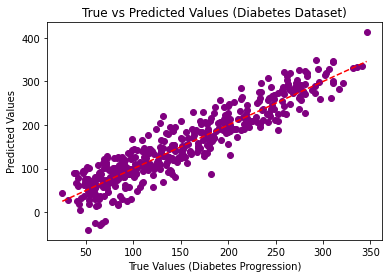

In [6]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

# Load the Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data  
y = diabetes.target   

# Generate random predictions with some noise around the true values
y_pred = y + np.random.normal(0, 30, size=len(y))  # Adding noise to the true values

# Calculate statistical measures: MSE, MAE, and R²
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print the metrics
print("Metrics for Diabetes dataset with random predictions:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

# Visualize the true vs predicted values
plt.scatter(y, y_pred, color='purple')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.title('True vs Predicted Values (Diabetes Dataset)')
plt.xlabel('True Values (Diabetes Progression)')
plt.ylabel('Predicted Values')
plt.show()

## 4- Training and Evaluating the Model

Validation Metrics:
MSE: 2702.61262929637
MAE: 42.74893775866236
R²: 0.9472659381426435

Test Metrics:
MSE: 2792.205502785376
MAE: 43.71863505547945
R²: 0.9155149533275658


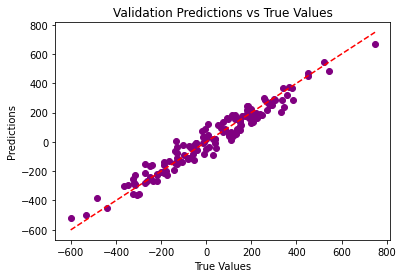

In [7]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Generate a random regression dataset with 1000 samples and 10 features
X, y = make_regression(n_samples=1000, n_features=10, noise=50)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on validation and testing sets
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Evaluate the model on validation set
val_mse = mean_squared_error(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print("Validation Metrics:")
print("MSE:", val_mse)
print("MAE:", val_mae)
print("R²:", val_r2)

# Evaluate the model on test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Metrics:")
print("MSE:", test_mse)
print("MAE:", test_mae)
print("R²:", test_r2)

# Visualize predictions vs true values for validation set
plt.scatter(y_val, y_val_pred, color='purple')
plt.title('Validation Predictions vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Plot a red diagonal line (ideal predictions)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--')
plt.show()


Validation Metrics:
MSE: 2987.7347799163354
MAE: 44.95657732033818
R²: 0.44957484763610434

Test Metrics:
MSE: 2810.800919968603
MAE: 42.07868422964655
R²: 0.527720990577115


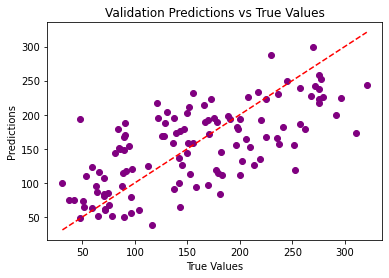

In [8]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.45)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on validation and testing sets
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Evaluate the model on validation set
val_mse = mean_squared_error(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print("Validation Metrics:")
print("MSE:", val_mse)
print("MAE:", val_mae)
print("R²:", val_r2)

# Evaluate the model on test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Metrics:")
print("MSE:", test_mse)
print("MAE:", test_mae)
print("R²:", test_r2)

# Visualize predictions vs true values for validation set
plt.scatter(y_val, y_val_pred, color='purple')
plt.title('Validation Predictions vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Plot a red diagonal line (ideal predictions)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--')
plt.show()